https://landcover.ai/



https://medium.com/spatial-data-science/deep-learning-for-geospatial-data-applications-semantic-segmentation-596d5d6e7c34

In [2]:
import numpy as np
from fastai.vision.all import get_image_files, SegmentationDataLoaders, unet_learner, resnet18

# Dowload : https://drive.google.com/file/d/1JgeAdkkzivB2TqtpP2yc9ays9b0ar9Ya/view

In [7]:
import torch

torch.cuda.empty_cache()
print(torch.cuda.memory_summary())

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 1            |        cudaMalloc retries: 2         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  459368 KB |    4559 MB |   63818 MB |   63370 MB |
|       from large pool |  446400 KB |    4545 MB |   63764 MB |   63328 MB |
|       from small pool |   12968 KB |      14 MB |      54 MB |      41 MB |
|---------------------------------------------------------------------------|
| Active memory         |  459368 KB |    4559 MB |   63818 MB |   63370 MB |
|       from large pool |  446400 KB |    4545 MB |   63764 MB |

```bash
mkdir .\Data\LandCoverData\images
mkdir .\Data\LandCoverData\labels

move .\Data\LandCoverData\*.jpg .\Data\LandCoverData\images
move .\Data\LandCoverData\*.png .\Data\LandCoverData\labels
```

In [3]:
path = r"./Data/LandCoverData"
fnames = get_image_files(path + "/images")

def label_func(fn): 
    return path + "/labels/" + f"{fn.stem}_m{'.png'}"

In [4]:
codes = np.array(["building", "woodland", "water", "Background"])

In [5]:
dls = SegmentationDataLoaders.from_label_func(path, bs=3, fnames=fnames, label_func=label_func, codes=codes)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


D:\anaconda3\lib\site-packages\torch\_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ..\aten\src\ATen\native\BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


D:\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,time


CUDA out of memory. Tried to allocate 298.00 MiB (GPU 0; 6.00 GiB total capacity; 4.14 GiB already allocated; 0 bytes free; 4.78 GiB reserved in total by PyTorch)


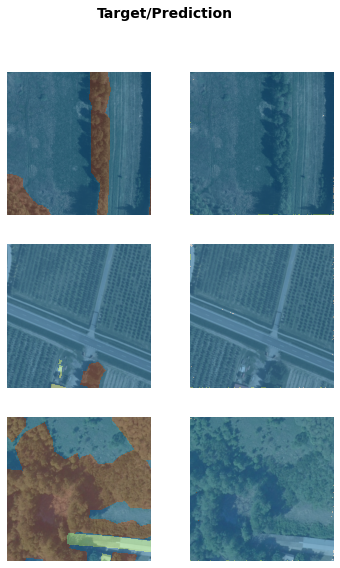

In [6]:
learn = unet_learner(dls, resnet18)

try:
    learn.fine_tune(3)
except RuntimeError as e:
    print(e)
finally:
    learn.show_results()

![](https://puu.sh/HUAGq/7cb0a39e7e.png)